--------
   ء  ا  ب  ة  ت  ث  ج  ح  د  ذ ...  ع  ف  ق  ك  ل   م    ن  ه  ى  ي
1  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0   3    4  0  0  0
2  0  0  9  0  0  0  0  0  7  0 ...  0  0  1  0  1  54  193  0  0  0

[2 rows x 28 columns]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


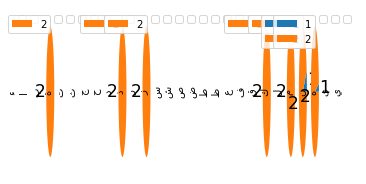

In [2]:
import csv
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt


def read_csv(input_path):
    l = []
    with open(input_path) as fb:
        fbreader = csv.reader(fb , delimiter='|', quoting=csv.QUOTE_NONE)
        x = 0
        for row in fbreader:
            l.append(row)
    
    return l
def filterDiac(row):
    f = ''
    for e in row:
        if(unicodedata.category(e) == 'Lo' or unicodedata.category(e) == 'Zs' ):
            f += e
    return f.strip()
def read_panda(input_path):
    df = pd.read_csv(input_path, header=None, delimiter='|', names=["sorah", "aya", "txt"], index_col=None)
    df['indx'] = df.index.tolist()
    df['txt-diac'] = df['txt'].apply(filterDiac)
    df['txt-last'] = df['txt-diac'].apply(lambda x : x[len(x)-1])
    df = df.set_index('sorah')
    #print(df.head())
    sorat = df.groupby('sorah')
    #ldf = pd.DataFrame(columns=['sora', 'char', 'count'])
    last_aya = {}
    aya_per_sora = {}
    for name, group in sorat:
        for s in group['txt-last']:
            if(s not in last_aya):
                last_aya[s] = 1
            else:
                last_aya[s] = last_aya[s] + 1
        aya_per_sora[name] = last_aya
        last_aya = {}
        #break
    print("--------")
    #for idx in aya_per_sora:
        #for n in aya_per_sora[idx]:
            #print(idx, '--', n, '--', aya_per_sora[idx][n])
    ldf = pd.DataFrame.from_dict(aya_per_sora, orient='index')
    ldf.sort_index(axis=1, inplace=True)
    ldf = ldf.fillna(0)
    ldf = ldf.astype('int32')
    #fig = plt.figure()
    gdf = ldf.iloc[0:2]
    print(gdf)
    plot = gdf.plot.pie(subplots=True, fontsize=17, figsize=(6, 3))
    #gdf.iloc[0].plot.pie(subplots=True, fontsize=20, figsize=(50, 50))
    #ldf.iloc[18].plot.pie(subplots=True, fontsize=20, figsize=(18, 14))
    #ldf.iloc[0].plot(kind = 'bar')
    #print(ldf.head())
    #print(sorat.describe())
    #print(sorat.get_group(3))
    #ltrs = df['txt-last']
    #print(ltrs)
    #for e in ltrs[0]:
        #print(unicodedata.category(e), ' ---- ', e)
read_panda('./Arabic-Original.csv')
